# Importar dataset desde Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# A) Con Python sin uso de librerías, calcule del ultimo cuartil, percentil 80 por columna; explique qué significa en cada caso.

In [ ]:
import pandas as pd

# Asegúrate de poner la ruta correcta a tu archivo CSV
file_path = '/content/drive/My Drive/primerParcial354/nintendo.csv'

# Lee el archivo CSV en un DataFrame de pandas
df = pd.read_csv(file_path)

# Muestra las primeras filas del DataFrame
print(df.columns)


Index(['meta_score', 'title', 'platform', 'date', 'user_score', 'link',
       'esrb_rating', 'developers', 'genres'],
      dtype='object')


In [ ]:
pip install pandas matplotlib


In [18]:
import csv

# Función para calcular percentiles
def calcula_percentile(data, percentile):
    size = len(data)
    sorted_data = sorted(data)
    index = int(round(percentile * size / 100 + 0.5)) - 1
    return sorted_data[index]

# Leer el archivo CSV y extraer los valores de 'meta_score' y 'user_score'
file_path = '/content/drive/My Drive/primerParcial354/nintendo.csv'
meta_scores = []
user_scores = []

with open(file_path, 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        try:
            if row['meta_score']:
                meta_scores.append(float(row['meta_score']))
            if row['user_score']:
                user_scores.append(float(row['user_score']))
        except ValueError:
            pass  # Si no se puede convertir a float, se ignora el valor

# Calcular percentiles 75 y 80 para 'meta_score' y 'user_score'
percentiles = {
    'meta_score': {
        '75th': calcula_percentile(meta_scores, 75),
        '80th': calcula_percentile(meta_scores, 80)
    },
    'user_score': {
        '75th': calcula_percentile(user_scores, 75),
        '80th': calcula_percentile(user_scores, 80)
    }
}

# Mostrar los resultados
print("Percentiles Calculados:")
for column, values in percentiles.items():
    print(f"{column}:")
    for percentile, value in values.items():
        print(f"  {percentile} percentile: {value}")

# Explicación
for column, values in percentiles.items():
    print(f"\nExplicación para {column}:")
    for percentile, value in values.items():
        print(f"  El {percentile} percentil es {value}, lo que significa que el {percentile}% de los juegos tienen una puntuación de {column} menor o igual a {value}.")



Percentiles Calculados:
meta_score:
  75th percentile: 83.0
  80th percentile: 85.0
user_score:
  75th percentile: 8.4
  80th percentile: 8.6

Explicación para meta_score:
  El 75th percentil es 83.0, lo que significa que el 75th% de los juegos tienen una puntuación de meta_score menor o igual a 83.0.
  El 80th percentil es 85.0, lo que significa que el 80th% de los juegos tienen una puntuación de meta_score menor o igual a 85.0.

Explicación para user_score:
  El 75th percentil es 8.4, lo que significa que el 75th% de los juegos tienen una puntuación de user_score menor o igual a 8.4.
  El 80th percentil es 8.6, lo que significa que el 80th% de los juegos tienen una puntuación de user_score menor o igual a 8.6.


# B) Realice lo mismo del inciso (a) con el uso de numpy y pandas

In [21]:
import pandas as pd
import numpy as np

# Leer el archivo CSV
file_path = '/content/drive/My Drive/primerParcial354/nintendo.csv'
df = pd.read_csv(file_path)

# Definir las columnas para las cuales se calcularán los percentiles
columns_of_interest = ['meta_score', 'user_score']

# Calcular percentiles 75 y 80
percentiles = {}
for column in columns_of_interest:
    if column in df:
        percentiles[column] = {
            '75th': df[column].dropna().astype(float).quantile(0.75),
            '80th': df[column].dropna().astype(float).quantile(0.80)
        }

# Mostrar los resultados
print("Percentiles Calculados:")
for column, values in percentiles.items():
    print(f"{column}:")
    for percentile, value in values.items():
        print(f"  {percentile} percentile: {value}")

# Explicación
for column, values in percentiles.items():
    print(f"\nExplicación para {column}:")
    for percentile, value in values.items():
        print(f"  El {percentile} percentil es {value}, lo que significa que el {percentile}% de los juegos tienen una puntuación de {column} menor o igual a {value}.")


Percentiles Calculados:
meta_score:
  75th percentile: 83.0
  80th percentile: 85.0
user_score:
  75th percentile: 8.4
  80th percentile: 8.6

Explicación para meta_score:
  El 75th percentil es 83.0, lo que significa que el 75th% de los juegos tienen una puntuación de meta_score menor o igual a 83.0.
  El 80th percentil es 85.0, lo que significa que el 80th% de los juegos tienen una puntuación de meta_score menor o igual a 85.0.

Explicación para user_score:
  El 75th percentil es 8.4, lo que significa que el 75th% de los juegos tienen una puntuación de user_score menor o igual a 8.4.
  El 80th percentil es 8.6, lo que significa que el 80th% de los juegos tienen una puntuación de user_score menor o igual a 8.6.


# C) Obtenga la media, mediana, moda y geométrica; explique la diferencia de los resultados y cuál de ellas se puede utilizar en un artículo científico.

In [27]:
import pandas as pd
import numpy as np
from scipy.stats import gmean, mode
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Verificar que el archivo existe en la ruta especificada
!ls /content/drive/My\ Drive/primerParcial354/

# Leer el archivo CSV
file_path = '/content/drive/My Drive/primerParcial354/nintendo.csv'
df = pd.read_csv(file_path)

# Inicializar un diccionario para almacenar los resultados
statistics = {}

# Identificar columnas numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Columnas numéricas: {numeric_columns}")

for column in numeric_columns:
    if column in df:
        # Eliminar valores NaN y convertir a float
        data = df[column].dropna().astype(float)

        if not data.empty:
            # Calcular estadísticas
            mean_value = np.mean(data)
            median_value = np.median(data)
            try:
                mode_value, count = mode(data)
                mode_value = mode_value[0] if count[0] > 1 else np.nan  # Si la moda no se repite, asignar NaN
            except IndexError:
                mode_value = np.nan
            geom_mean_value = gmean(data) if all(data > 0) else np.nan  # gmean requiere todos valores positivos

            # Almacenar resultados en el diccionario
            statistics[column] = {
                'mean': mean_value,
                'median': median_value,
                'mode': mode_value,
                'geometric_mean': geom_mean_value
            }

# Mostrar los resultados
print("Estadísticas Calculadas:")
for column, values in statistics.items():
    print(f"{column}:")
    for stat, value in values.items():
        print(f"  {stat}: {value}")

# Explicación
for column, values in statistics.items():
    print(f"\nExplicación para {column}:")
    print(f"  Media (Mean): {values['mean']} - Promedio aritmético de los datos.")
    print(f"  Mediana (Median): {values['median']} - Valor central que divide la mitad inferior y superior de los datos.")
    print(f"  Moda (Mode): {values['mode']} - Valor que aparece con mayor frecuencia en los datos.")
    print(f"  Media Geométrica (Geometric Mean): {values['geometric_mean']} - Promedio multiplicativo que es útil para datos con tasas de crecimiento.")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ejercicio1  ejercicio2	ejercicio3  nintendo.csv
Columnas numéricas: ['meta_score', 'user_score']
Estadísticas Calculadas:
meta_score:
  mean: 75.95612708018155
  median: 77.0
  mode: nan
  geometric_mean: 75.13197068799833
user_score:
  mean: 7.6956241956241955
  median: 7.9
  mode: nan
  geometric_mean: 7.615291557173658

Explicación para meta_score:
  Media (Mean): 75.95612708018155 - Promedio aritmético de los datos.
  Mediana (Median): 77.0 - Valor central que divide la mitad inferior y superior de los datos.
  Moda (Mode): nan - Valor que aparece con mayor frecuencia en los datos.
  Media Geométrica (Geometric Mean): 75.13197068799833 - Promedio multiplicativo que es útil para datos con tasas de crecimiento.

Explicación para user_score:
  Media (Mean): 7.6956241956241955 - Promedio aritmético de los datos.
  Mediana (Median): 7.9 - Valor central que div

# D) Grafique los datos y explique su comportamiento (PYTHON)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Columnas numéricas: ['meta_score', 'user_score']
Estadísticas Calculadas:
meta_score:
  mean: 75.95612708018155
  median: 77.0
  mode: nan
  geometric_mean: 75.13197068799833
user_score:
  mean: 7.6956241956241955
  median: 7.9
  mode: nan
  geometric_mean: 7.615291557173658


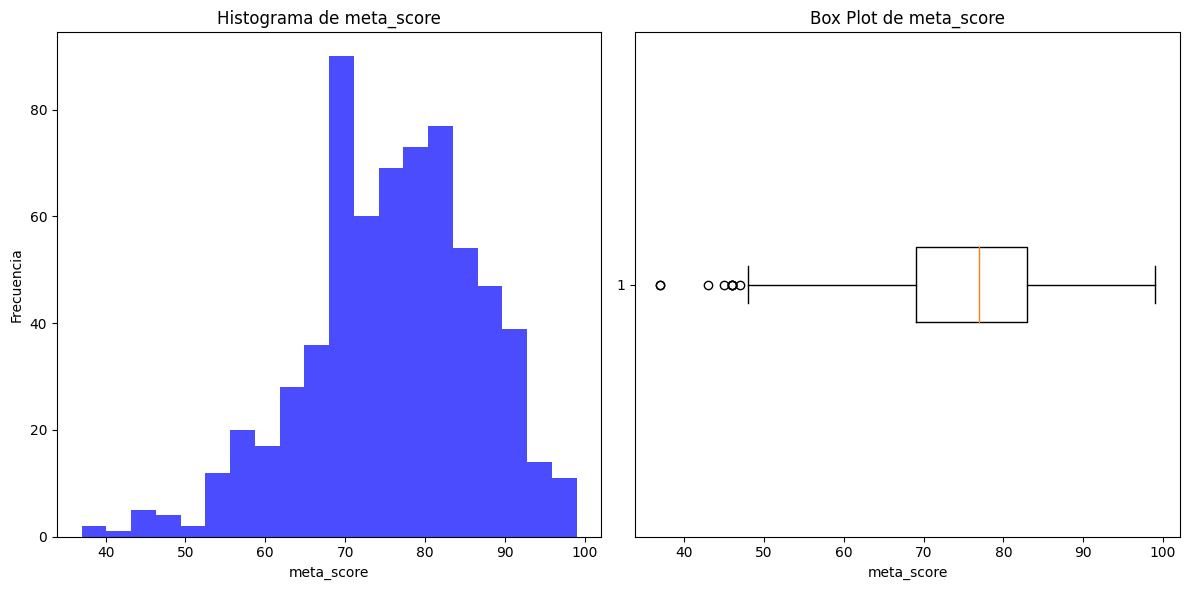


Explicación del comportamiento de meta_score:
  La media es 75.95612708018155, lo que indica el valor promedio de la columna.
  La mediana es 77.0, lo que representa el valor central.
  La moda es nan, lo que representa el valor más frecuente.
  La media geométrica es 75.13197068799833, útil para datos con tasas de crecimiento.
  El histograma muestra la distribución de los datos, mientras que el box plot muestra la dispersión y posibles valores atípicos.


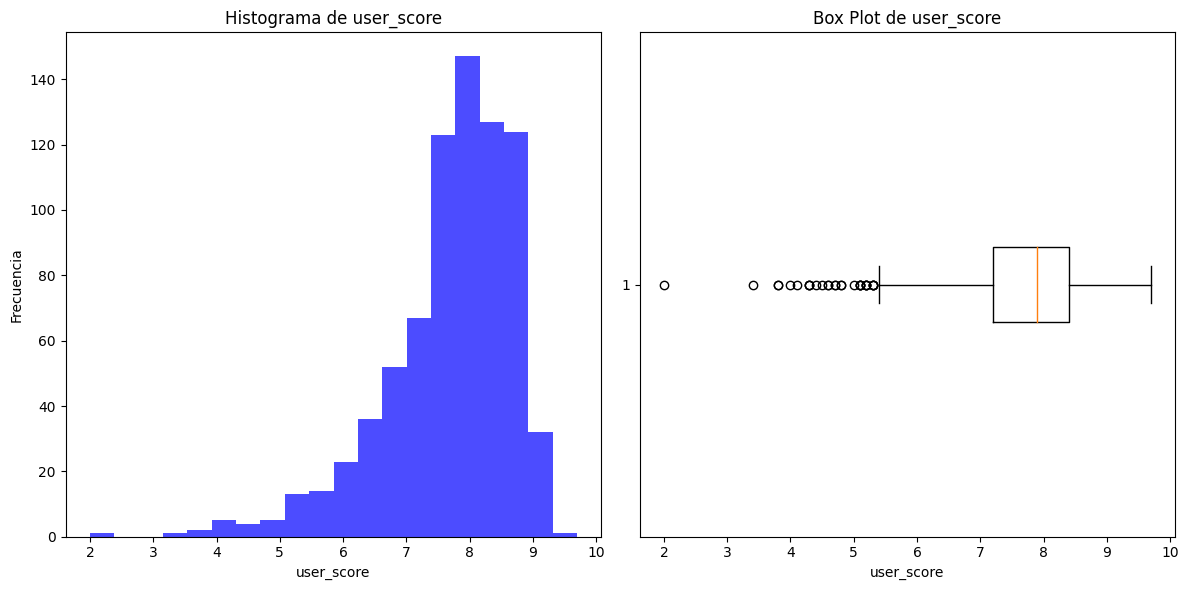


Explicación del comportamiento de user_score:
  La media es 7.6956241956241955, lo que indica el valor promedio de la columna.
  La mediana es 7.9, lo que representa el valor central.
  La moda es nan, lo que representa el valor más frecuente.
  La media geométrica es 7.615291557173658, útil para datos con tasas de crecimiento.
  El histograma muestra la distribución de los datos, mientras que el box plot muestra la dispersión y posibles valores atípicos.


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gmean, mode
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Leer el archivo CSV
file_path = '/content/drive/My Drive/primerParcial354/nintendo.csv'
df = pd.read_csv(file_path)

# Inicializar un diccionario para almacenar los resultados
statistics = {}

# Identificar columnas numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Columnas numéricas: {numeric_columns}")

for column in numeric_columns:
    if column in df:
        # Eliminar valores NaN y convertir a float
        data = df[column].dropna().astype(float)

        if not data.empty:
            # Calcular estadísticas
            mean_value = np.mean(data)
            median_value = np.median(data)
            try:
                mode_value, count = mode(data)
                mode_value = mode_value[0] if count[0] > 1 else np.nan  # Si la moda no se repite, asignar NaN
            except IndexError:
                mode_value = np.nan
            geom_mean_value = gmean(data) if all(data > 0) else np.nan  # gmean requiere todos valores positivos

            # Almacenar resultados en el diccionario
            statistics[column] = {
                'mean': mean_value,
                'median': median_value,
                'mode': mode_value,
                'geometric_mean': geom_mean_value
            }

# Mostrar los resultados
print("Estadísticas Calculadas:")
for column, values in statistics.items():
    print(f"{column}:")
    for stat, value in values.items():
        print(f"  {stat}: {value}")

# Graficar los datos
for column in numeric_columns:
    if column in df:
        data = df[column].dropna().astype(float)

        plt.figure(figsize=(12, 6))

        # Histograma
        plt.subplot(1, 2, 1)
        plt.hist(data, bins=20, color='blue', alpha=0.7)
        plt.title(f'Histograma de {column}')
        plt.xlabel(column)
        plt.ylabel('Frecuencia')

        # Box Plot
        plt.subplot(1, 2, 2)
        plt.boxplot(data, vert=False)
        plt.title(f'Box Plot de {column}')
        plt.xlabel(column)

        plt.tight_layout()
        plt.show()

        # Explicación del comportamiento
        print(f"\nExplicación del comportamiento de {column}:")
        print(f"  La media es {statistics[column]['mean']}, lo que indica el valor promedio de la columna.")
        print(f"  La mediana es {statistics[column]['median']}, lo que representa el valor central.")
        print(f"  La moda es {statistics[column]['mode']}, lo que representa el valor más frecuente.")
        print(f"  La media geométrica es {statistics[column]['geometric_mean']}, útil para datos con tasas de crecimiento.")
        print(f"  El histograma muestra la distribución de los datos, mientras que el box plot muestra la dispersión y posibles valores atípicos.")
